# pyAudioAnalysis
--- 
pyAudioAnalysis is a Python library covering a wide range of audio analysis tasks. Through pyAudioAnalysis you can:

- Extract audio features and representations (e.g. mfccs, spectrogram, chromagram)
- Train, parameter tune and evaluate classifiers of audio segments
- Classify unknown sounds
- Detect audio events and exclude silence periods from long recordings

### Install py Audio Analysis
```bash
pip3 install pyAudioAnalysis
pip3 install eyed3
pip3 install plotly
```
---

### Features extraction

In [4]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt

#### File name _doremi.wav_ is our input audio file 

In [5]:
import IPython
IPython.display.Audio("doremi.wav")

In [6]:
[Fs, x] = audioBasicIO.read_audio_file("doremi.wav")

In [7]:
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)

- F now contains all the usefull features 
- like F's first column has the _zero crossing rate_ features
- **column** is the id in which that perticular feature is saved

<table role="table">
<thead>
<tr>
<th align="center">Feature ID</th>
<th align="center">Feature Name</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td align="center">1</td>
<td align="center">Zero Crossing Rate</td>
<td>The rate of sign-changes of the signal during the duration of a particular frame.</td>
</tr>
<tr>
<td align="center">2</td>
<td align="center">Energy</td>
<td>The sum of squares of the signal values, normalized by the respective frame length.</td>
</tr>
<tr>
<td align="center">3</td>
<td align="center">Entropy of Energy</td>
<td>The entropy of sub-frames' normalized energies. It can be interpreted as a measure of abrupt changes.</td>
</tr>
<tr>
<td align="center">4</td>
<td align="center">Spectral Centroid</td>
<td>The center of gravity of the spectrum.</td>
</tr>
<tr>
<td align="center">5</td>
<td align="center">Spectral Spread</td>
<td>The second central moment of the spectrum.</td>
</tr>
<tr>
<td align="center">6</td>
<td align="center">Spectral Entropy</td>
<td>Entropy of the normalized spectral energies for a set of sub-frames.</td>
</tr>
<tr>
<td align="center">7</td>
<td align="center">Spectral Flux</td>
<td>The squared difference between the normalized magnitudes of the spectra of the two successive frames.</td>
</tr>
<tr>
<td align="center">8</td>
<td align="center">Spectral Rolloff</td>
<td>The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.</td>
</tr>
<tr>
<td align="center">9-21</td>
<td align="center">MFCCs</td>
<td>Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.</td>
</tr>
<tr>
<td align="center">22-33</td>
<td align="center">Chroma Vector</td>
<td>A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).</td>
</tr>
<tr>
<td align="center">34</td>
<td align="center">Chroma Deviation</td>
<td>The standard deviation of the 12 chroma coefficients.</td>
</tr>
</tbody>
</table>

- The total number of short-term features implemented in pyAudioAnalysis is 34. In addition, the delta features are optionally computed (they are by default enabled, but can be disabled by setting the deltas argument in feature_extraction() to false). So, the total number of short-term features, including the deltas is 64.

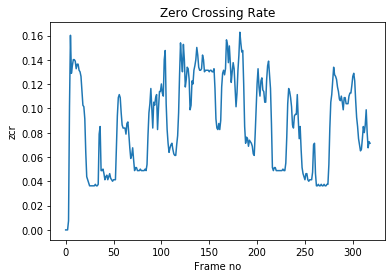

In [8]:
plt.plot(F[0,:])
plt.xlabel('Frame no')
plt.ylabel(f_names[0]) 
plt.title("Zero Crossing Rate")
plt.show()

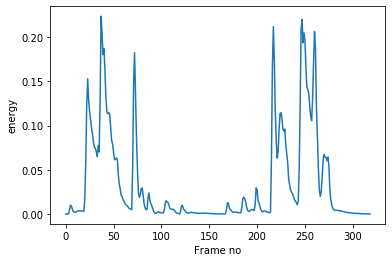

In [9]:
plt.plot(F[1,:]) 
plt.xlabel('Frame no')
plt.ylabel(f_names[1])
plt.show()

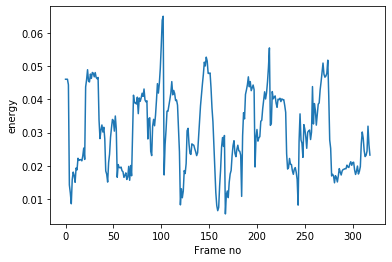

In [10]:
plt.plot(F[33,:]) 
plt.xlabel('Frame no')
plt.ylabel(f_names[1])
plt.show()

In [11]:
print(f"total no of features: {len(F)}")

total no of features: 68


## Classification
---
- A segment classification functionality is provided in the library, in order to train and use supervised models that classify an unknown audio segment to a set of predefined classes (e.g. music and speech).

- To train the model put the data in respective class folder and then give the directory of those folders in data list
- Different algorithms to chose from to perform classificaton problem
    - K Nearest Neighbour kNN as ("knn")
    - Support Vector Machines as ("svm")
    - Random forests  as ("randomforest")
    - Extra trees     as ("extratrees")
    - Gradient boosting as ("gradientboosting")

#### Training 

In [16]:
from pyAudioAnalysis import audioTrainTest as aT

data = ["speech","music"]

aT.extract_features_and_train(
    data, 
    1.0, 1.0, 
    aT.shortTermWindow, 
    aT.shortTermStep, 
    "svm", 
    "svmSMtemp",
    False
)


Analyzing file 1 of 47: classifierData/speech/00.wav
Analyzing file 2 of 47: classifierData/speech/01.wav
Analyzing file 3 of 47: classifierData/speech/02.wav
Analyzing file 4 of 47: classifierData/speech/03.wav
Analyzing file 5 of 47: classifierData/speech/04.wav
Analyzing file 6 of 47: classifierData/speech/05.wav
Analyzing file 7 of 47: classifierData/speech/06.wav
Analyzing file 8 of 47: classifierData/speech/07.wav
Analyzing file 9 of 47: classifierData/speech/08.wav
Analyzing file 10 of 47: classifierData/speech/09.wav
Analyzing file 11 of 47: classifierData/speech/10.wav
Analyzing file 12 of 47: classifierData/speech/11.wav
Analyzing file 13 of 47: classifierData/speech/12.wav
Analyzing file 14 of 47: classifierData/speech/13.wav
Analyzing file 15 of 47: classifierData/speech/14.wav
Analyzing file 16 of 47: classifierData/speech/15.wav
Analyzing file 17 of 47: classifierData/speech/16.wav
Analyzing file 18 of 47: classifierData/speech/17.wav
Analyzing file 19 of 47: classifierDa

Param = 0.01000 - classifier Evaluation Experiment 27 of 100
Param = 0.01000 - classifier Evaluation Experiment 28 of 100
Param = 0.01000 - classifier Evaluation Experiment 29 of 100
Param = 0.01000 - classifier Evaluation Experiment 30 of 100
Param = 0.01000 - classifier Evaluation Experiment 31 of 100
Param = 0.01000 - classifier Evaluation Experiment 32 of 100
Param = 0.01000 - classifier Evaluation Experiment 33 of 100
Param = 0.01000 - classifier Evaluation Experiment 34 of 100
Param = 0.01000 - classifier Evaluation Experiment 35 of 100
Param = 0.01000 - classifier Evaluation Experiment 36 of 100
Param = 0.01000 - classifier Evaluation Experiment 37 of 100
Param = 0.01000 - classifier Evaluation Experiment 38 of 100
Param = 0.01000 - classifier Evaluation Experiment 39 of 100
Param = 0.01000 - classifier Evaluation Experiment 40 of 100
Param = 0.01000 - classifier Evaluation Experiment 41 of 100
Param = 0.01000 - classifier Evaluation Experiment 42 of 100
Param = 0.01000 - classi

Param = 0.50000 - classifier Evaluation Experiment 69 of 100
Param = 0.50000 - classifier Evaluation Experiment 70 of 100
Param = 0.50000 - classifier Evaluation Experiment 71 of 100
Param = 0.50000 - classifier Evaluation Experiment 72 of 100
Param = 0.50000 - classifier Evaluation Experiment 73 of 100
Param = 0.50000 - classifier Evaluation Experiment 74 of 100
Param = 0.50000 - classifier Evaluation Experiment 75 of 100
Param = 0.50000 - classifier Evaluation Experiment 76 of 100
Param = 0.50000 - classifier Evaluation Experiment 77 of 100
Param = 0.50000 - classifier Evaluation Experiment 78 of 100
Param = 0.50000 - classifier Evaluation Experiment 79 of 100
Param = 0.50000 - classifier Evaluation Experiment 80 of 100
Param = 0.50000 - classifier Evaluation Experiment 81 of 100
Param = 0.50000 - classifier Evaluation Experiment 82 of 100
Param = 0.50000 - classifier Evaluation Experiment 83 of 100
Param = 0.50000 - classifier Evaluation Experiment 84 of 100
Param = 0.50000 - classi

Param = 5.00000 - classifier Evaluation Experiment 23 of 100
Param = 5.00000 - classifier Evaluation Experiment 24 of 100
Param = 5.00000 - classifier Evaluation Experiment 25 of 100
Param = 5.00000 - classifier Evaluation Experiment 26 of 100
Param = 5.00000 - classifier Evaluation Experiment 27 of 100
Param = 5.00000 - classifier Evaluation Experiment 28 of 100
Param = 5.00000 - classifier Evaluation Experiment 29 of 100
Param = 5.00000 - classifier Evaluation Experiment 30 of 100
Param = 5.00000 - classifier Evaluation Experiment 31 of 100
Param = 5.00000 - classifier Evaluation Experiment 32 of 100
Param = 5.00000 - classifier Evaluation Experiment 33 of 100
Param = 5.00000 - classifier Evaluation Experiment 34 of 100
Param = 5.00000 - classifier Evaluation Experiment 35 of 100
Param = 5.00000 - classifier Evaluation Experiment 36 of 100
Param = 5.00000 - classifier Evaluation Experiment 37 of 100
Param = 5.00000 - classifier Evaluation Experiment 38 of 100
Param = 5.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 90 of 100
Param = 10.00000 - classifier Evaluation Experiment 91 of 100
Param = 10.00000 - classifier Evaluation Experiment 92 of 100
Param = 10.00000 - classifier Evaluation Experiment 93 of 100
Param = 10.00000 - classifier Evaluation Experiment 94 of 100
Param = 10.00000 - classifier Evaluation Experiment 95 of 100
Param = 10.00000 - classifier Evaluation Experiment 96 of 100
Param = 10.00000 - classifier Evaluation Experiment 97 of 100
Param = 10.00000 - classifier Evaluation Experiment 98 of 100
Param = 10.00000 - classifier Evaluation Experiment 99 of 100
Param = 10.00000 - classifier Evaluation Experiment 100 of 100
Param = 20.00000 - classifier Evaluation Experiment 1 of 100
Param = 20.00000 - classifier Evaluation Experiment 2 of 100
Param = 20.00000 - classifier Evaluation Experiment 3 of 100
Param = 20.00000 - classifier Evaluation Experiment 4 of 100
Param = 20.00000 - classifier Evaluation Experiment 5 of 100
Param = 20.0

#### Prediction

In [17]:
aT.file_classification("classifierTest/music.wav", "svmSMtemp","svm")

(1.0, array([0.23757746, 0.76242254]), ['speech', 'music'])

#### In return we get array of prediction 
- array([0.7569763, 0.2430237]), ['music', 'speech']
- so the probality that the given input is music is 0.75 and that to be speech is 0.24
- Names of classes while prediction are taken directly from training folder

In [18]:
aT.file_classification("classifierTest/speech.wav", "svmSMtemp","svm")

(0.0, array([0.96330659, 0.03669341]), ['speech', 'music'])

- so the probality that the given input is music is 0.04 and that to be speech is 0.95